In [121]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Data Generation

In [122]:
def generate_data(sample_size):
    mean_blue = [1,0]
    mean_orange = [0,1]
    mean_cov = np.eye(2)
    mean_size = 10
    
    blue_centers = np.random.multivariate_normal(mean_blue, mean_cov, mean_size)
    orange_centers = np.random.multivariate_normal(mean_orange, mean_cov, mean_size)
    
#     sample_size = 100
    sample_cov = mean_cov/5
    
    blue_samples = list(np.zeros(sample_size))
    for i in range(sample_size):
        blue_samples[i] = np.random.multivariate_normal(blue_centers[random.randint(0,mean_size-1)], sample_cov, 1)
    blue_samples = [item[0] for item in blue_samples]
    blue_y = np.zeros(sample_size)
    
    orange_samples = list(np.zeros(sample_size))
    for i in range(sample_size):
        orange_samples[i] = np.random.multivariate_normal(orange_centers[random.randint(0,mean_size-1)], sample_cov, 1)
    orange_samples = [item[0] for item in orange_samples]
    orange_y = np.ones(sample_size)
    
    data_x = np.concatenate((blue_samples,orange_samples), axis = 0)
    data_y = np.concatenate((blue_y, orange_y))
    
    return blue_centers, orange_centers, data_x, data_y



In [123]:
blue_centers, orange_centers, data_x, data_y = generate_data(100)

In [124]:
blue_samples = data_x[data_y==0, :]
orange_samples = data_x[data_y==1, :]

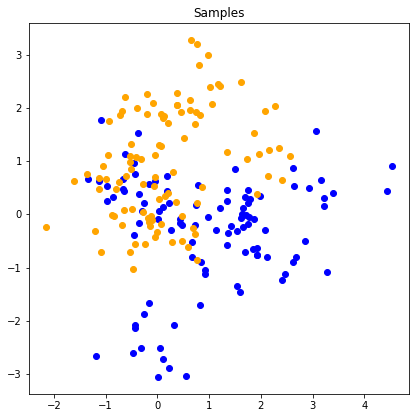

In [125]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(2,2,1)

ax1.plot(blue_samples[:,0], blue_samples[:,1], 'o', color='blue')
ax1.plot(orange_samples[:,0], orange_samples[:,1], 'o', color='orange')
ax1.set_title("Samples")
plt.show()

# Bayes Optimal Classifier

Using Bayes Opimal Classifer, we have to know the orignal distribution of data. (Posteriori Probability). <br>
But usually in real life we don't know. <br>
Naive Bayes will estimate the distribution by independence assumption.

In [126]:
import scipy
import scipy.stats

In [127]:
mean_cov = np.eye(2)

In [128]:
def predict_Bayes_class(X,mu_list,mean_cov): 
    # Returns the mean density from data generation methods - distributions must be known
    
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=mean_cov)
        scores_list.append(score)
#     print(len(scores_list))
#     print(scores_list)        
    return np.mean(scores_list)

In [129]:
min_x = data_x.min(axis=0)
max_x = data_x.max(axis=0)
print(min_x, max_x)
arr = np.array([(i, j)
                   for i in np.linspace(min_x[0]-.1, max_x[0]+.1, 100)
                   for j in np.linspace(min_x[1]-.1, max_x[1]+.1, 100)])

[-2.14643156 -3.0598768 ] [4.53721296 3.28496116]


In [130]:
arr

array([[-2.24643156, -3.1598768 ],
       [-2.24643156, -3.09376733],
       [-2.24643156, -3.02765785],
       ...,
       [ 4.63721296,  3.25274221],
       [ 4.63721296,  3.31885168],
       [ 4.63721296,  3.38496116]])

In [131]:
predict_Bayes_class(arr[0], orange_centers, mean_cov)

0.00019615641343224467

In [132]:
len(arr)

10000

In [133]:
blue_density = np.zeros(len(arr))
orange_density = np.zeros(len(arr))

In [134]:
for i in range(len(arr)):
    blue_density[i] = predict_Bayes_class(arr[i], blue_centers, mean_cov)
    orange_density[i] = predict_Bayes_class(arr[i], orange_centers, mean_cov)
    

In [135]:
mask_blue = blue_density > orange_density

In [136]:
mask_orange = ~mask_blue

In [137]:
arr[mask_blue][:,0]

array([-2.24643156, -2.24643156, -2.24643156, ...,  4.63721296,
        4.63721296,  4.63721296])

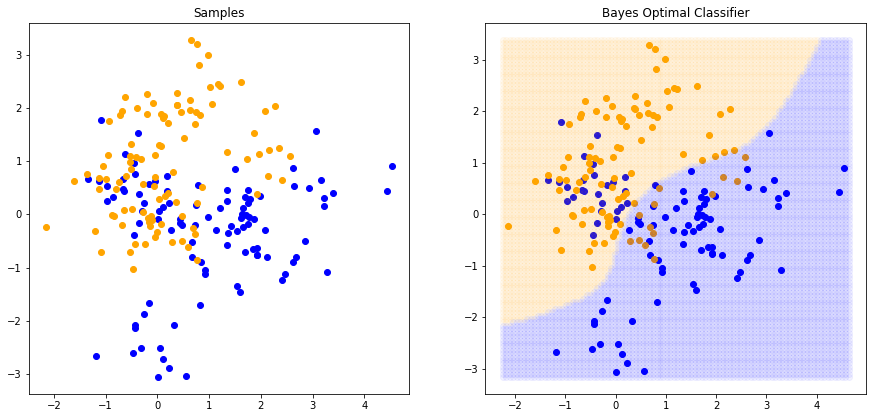

In [138]:
ax2 = fig.add_subplot(2,2,2)
ax2.clear()
ax2.plot(blue_samples[:,0], blue_samples[:,1], 'o', color='blue')
ax2.plot(orange_samples[:,0], orange_samples[:,1], 'o', color='orange')
ax2.plot(arr[mask_blue][:,0], arr[mask_blue][:,1], 'o', color='blue', alpha=0.05)
ax2.plot(arr[mask_orange][:,0], arr[mask_orange][:,1], 'o', color='orange', alpha=0.05)
ax2.set_title("Bayes Optimal Classifier")
fig

# Predict Errors

In [139]:
def BOC_error(sample_x, sample_y):
    error = 0
    for x, y in zip(sample_x, sample_y):
        blue_density = predict_Bayes_class(x, blue_centers, mean_cov)
        orange_density = predict_Bayes_class(x, orange_centers, mean_cov)
        prediction = 1 if orange_density>blue_density else 0
        error += abs(prediction - y)
    error = error/len(sample_x)
    return error

In [140]:
def generate_BOCtest_data(sample_size, blue_centers, orange_centers):
    mean_blue = [1,0]
    mean_orange = [0,1]
    mean_cov = np.eye(2)
    mean_size = 10
    
#     blue_centers = np.random.multivariate_normal(mean_blue, mean_cov, mean_size)
#     orange_centers = np.random.multivariate_normal(mean_orange, mean_cov, mean_size)
    
#     sample_size = 100
    sample_cov = mean_cov/5
    
    blue_samples = list(np.zeros(sample_size))
    for i in range(sample_size):
        blue_samples[i] = np.random.multivariate_normal(blue_centers[random.randint(0,mean_size-1)], sample_cov, 1)
    blue_samples = [item[0] for item in blue_samples]
    blue_y = np.zeros(sample_size)
    
    orange_samples = list(np.zeros(sample_size))
    for i in range(sample_size):
        orange_samples[i] = np.random.multivariate_normal(orange_centers[random.randint(0,mean_size-1)], sample_cov, 1)
    orange_samples = [item[0] for item in orange_samples]
    orange_y = np.ones(sample_size)
    
    data_x = np.concatenate((blue_samples,orange_samples), axis = 0)
    data_y = np.concatenate((blue_y, orange_y))
    
    return data_x, data_y




In [143]:
test_x, test_y = generate_BOCtest_data(1000, blue_centers, orange_centers)

In [144]:
BOC_error(test_x, test_y)

0.2245